<h1># Part 1: Loading datasets, cleaning and joining datasets</h1>

<h3>1.1 Loading Libraries</h3>

In [81]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import statsmodels.api as sm

<h3>1.2 Loading Datasets</h3>

In [82]:
def get_config():
    with open("config.yaml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()

consumption_path = os.path.join(os.getcwd()+ '/datasets',config['consumption']) 
death_path       = os.path.join(os.getcwd()+ '/datasets',config['death'])
population_path  = os.path.join(os.getcwd()+ '/datasets',config['population'])
        

df_consumption = pd.read_csv(consumption_path)
df_death = pd.read_csv(death_path)
df_population = pd.read_csv(population_path)


# Data Inspetion

In [83]:
def df_inspetion1(df_consumption, df_death, df_population):

    # Data Types
    print(f'The types of df_consumption columns\n{df_consumption.dtypes}')
    print(f'\nThe types of df_death columns\n{df_death.dtypes}')
    print(f'\nThe types of df_death columns\n{df_population.dtypes}')

    # Check for missing data
    print(df_consumption.isnull().sum())
    print(df_death.isnull().sum())
    print(df_population.isnull().sum())

    

df_inspetion1(df_consumption, df_death, df_population)   

The types of df_consumption columns
Entity                                                                                                   object
Code                                                                                                     object
Year                                                                                                      int64
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    float64
dtype: object

The types of df_death columns
Country                                                                                                                 object
Code                                                                                                                    object
Year                                                                                                                     int64
Deaths that are from all causes attributed to high systolic blood pressure, in both sexes 

In [84]:
df_consumption['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].max()

20.5

<h3>1.3: Data Cleaning</h3> 



In [85]:
# Remove rows with NaN values ( NaN values can represent missing or undefined data)

df_consumption = df_consumption.dropna()

df_death = df_death.dropna()

print(df_consumption)
print(df_death)


          Entity Code  Year  \
0    Afghanistan  AFG  2010   
1    Afghanistan  AFG  2015   
2    Afghanistan  AFG  2018   
3        Albania  ALB  2000   
4        Albania  ALB  2005   
..           ...  ...   ...   
989     Zimbabwe  ZWE  2000   
990     Zimbabwe  ZWE  2005   
991     Zimbabwe  ZWE  2010   
992     Zimbabwe  ZWE  2015   
993     Zimbabwe  ZWE  2018   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  
0                                                 0.21                                                     
1                                                 0.21                                                     
2                                                 0.21                                                     
3                                                 6.57                                                     
4                                                 7.65                                 

In [86]:
#Check for duplicates across all columns, if duplicates found, delete one row
df_duplicate_consumption = df_consumption[df_consumption.duplicated()]
df_duplicate_death = df_death[df_death.duplicated()]
df_duplicate_population = df_population[df_population.duplicated()]

# Remove duplicate rows
df_consumption = df_consumption.drop_duplicates()
df_death = df_death.drop_duplicates()
df_population = df_population.drop_duplicates()

# Ensure 'Year' is of integer type
df_consumption['Year'] = df_consumption['Year'].astype(int)
df_death['Year'] = df_death['Year'].astype(int)
df_population['Year'] = df_population['Year'].astype(int)

In [87]:
#Rename the Title Entity to Country
df_consumption.rename(columns = {'Entity':'Country','Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'Alchohol consumption'
                                 },inplace = True)
df_consumption
#Rename the Title Entity to Country
df_death.rename(columns={'Entity':'Country','Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages':'Deaths due to Alchohol'},inplace = True)
#df_death

In [88]:
#filter related rows from each datasets(for merging 3 datasets based on Year and country I had to remove years except 2000,2005,2010,2015,2018)
df_death = df_death[df_death['Year'].isin([2000, 2005, 2010, 2015, 2018])]
df_death.head()


,Country,Code,Year,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages",Deaths due to Alchohol,"Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages","Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
10,Afghanistan,AFG,2000,29998.512,1259.5785,8328.075,427.25616,4174.3380,9941.9700,6227.1470,...,311.84225,430.62665,3855.2944,12964.9210,4194.9717,897.32550,3541.8700,3013.0520,8233.2160,14938.048
15,Afghanistan,AFG,2005,30089.117,1276.1282,8415.446,451.53430,4165.9834,10118.1620,6272.2593,...,390.27414,454.32657,1243.2245,8380.3150,3518.7990,1006.88530,3732.9456,3152.8270,8033.1580,15250.393
20,Afghanistan,AFG,2010,30352.130,1247.5607,8511.792,491.64770,4022.3460,6020.6436,5714.1074,...,463.43330,515.36005,1413.2369,6192.1600,2661.0232,980.61330,4922.3520,3344.4604,5535.3350,15760.845
25,Afghanistan,AFG,2015,32639.936,1301.6910,9228.382,521.93640,4163.0680,4796.1630,5785.0560,...,566.39777,589.87384,697.5783,4205.5890,2310.9731,832.58203,7675.1245,3694.9897,4693.1943,17378.768
28,Afghanistan,AFG,2018,35262.600,1400.2490,10085.003,574.54584,4486.7295,3993.8105,5987.4893,...,673.01670,642.23627,608.2867,3535.8152,1881.7853,778.18884,8131.1520,4021.1040,4077.5671,19182.750


In [89]:
#creating a whole new cleaned dataset before merging so that it could be easy to understand
new_columns = ['Country','Code','Year','Deaths due to Alchohol']

df_new_death = df_death[new_columns]

df_new_death.to_csv('df_new_death.csv', index=False)

In [90]:
df_new_death = df_new_death.reset_index().drop(columns='index')
df_death = df_death.reset_index().drop(columns='index')
df_consumption = df_consumption.reset_index().drop(columns='index')

<h3>1.4: Merging Datasets</h3>

Put eveythig in functions

MOre explanation

In [91]:
#merge 2 datasets(Merged BASED on Country and Year column)
df_merge = pd.merge(df_consumption,df_new_death, on=['Country','Year', 'Code'], how='inner')
df_merge.head()

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol
0,Afghanistan,AFG,2010,0.21,491.64770
1,Afghanistan,AFG,2015,0.21,521.93640
2,Afghanistan,AFG,2018,0.21,574.54584
3,Albania,ALB,2000,6.57,511.38745
4,Albania,ALB,2005,7.65,640.57010


In [92]:
# Merge population dataset with the main dataset(to create Mortality for each individual country ,total population is needed)

df = pd.merge(df_merge,df_population, on=['Country','Year'], how='inner')
df

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,AFG,2010,0.21,491.64770,27803000
1,Afghanistan,AFG,2015,0.21,521.93640,33361000
2,Afghanistan,AFG,2018,0.21,574.54584,36161000
3,Albania,ALB,2000,6.57,511.38745,3196000
4,Albania,ALB,2005,7.65,640.57010,3047000
...,...,...,...,...,...,...
889,Zimbabwe,ZWE,2000,2.46,4209.50540,11791000
890,Zimbabwe,ZWE,2005,2.77,4486.24000,12196000
891,Zimbabwe,ZWE,2010,3.93,4939.37400,12753000
892,Zimbabwe,ZWE,2015,4.92,4853.71830,14006000


In [93]:
#remove Column name Code (as i already have the Country column so i dont need the code Column)

df = df.drop(columns='Code')
df

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,2010,0.21,491.64770,27803000
1,Afghanistan,2015,0.21,521.93640,33361000
2,Afghanistan,2018,0.21,574.54584,36161000
3,Albania,2000,6.57,511.38745,3196000
4,Albania,2005,7.65,640.57010,3047000
...,...,...,...,...,...
889,Zimbabwe,2000,2.46,4209.50540,11791000
890,Zimbabwe,2005,2.77,4486.24000,12196000
891,Zimbabwe,2010,3.93,4939.37400,12753000
892,Zimbabwe,2015,4.92,4853.71830,14006000


In [94]:
#remove NaN value
df.dropna(how='any',inplace=True)
df.head()

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,2010,0.21,491.64770,27803000
1,Afghanistan,2015,0.21,521.93640,33361000
2,Afghanistan,2018,0.21,574.54584,36161000
3,Albania,2000,6.57,511.38745,3196000
4,Albania,2005,7.65,640.57010,3047000


In [95]:
#save dataset
df.to_csv('df.csv')

In [96]:
#Remove World from df because my search is based on country

df = df[df["Country"] != 'World']

# Presenting section


In [97]:
# Step 1: Calculate Mortality Rate due to Alcohol per 100,000 population
df['Mortality Rate'] = (df['Deaths due to Alchohol'] / df['Total Population']) * 100000 # Explain this in-detail

# To view the first ffive rows of the transformed main DataFrame
df.head()

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population,Mortality Rate
0,Afghanistan,2010,0.21,491.64770,27803000,1.768326
1,Afghanistan,2015,0.21,521.93640,33361000,1.564511
2,Afghanistan,2018,0.21,574.54584,36161000,1.588855
3,Albania,2000,6.57,511.38745,3196000,16.000859
4,Albania,2005,7.65,640.57010,3047000,21.022977


In [98]:
# Calculate mean alcohol consumption and mean mortality rate per year

yearly_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

# To view the yearly trends
yearly_trends.head()


,Year,Alchohol consumption,Mortality Rate
0,2000,6.057767,34.090226
1,2005,6.149659,35.213191
2,2010,6.164311,35.117312
3,2015,6.080077,33.854617
4,2018,5.996945,34.047410


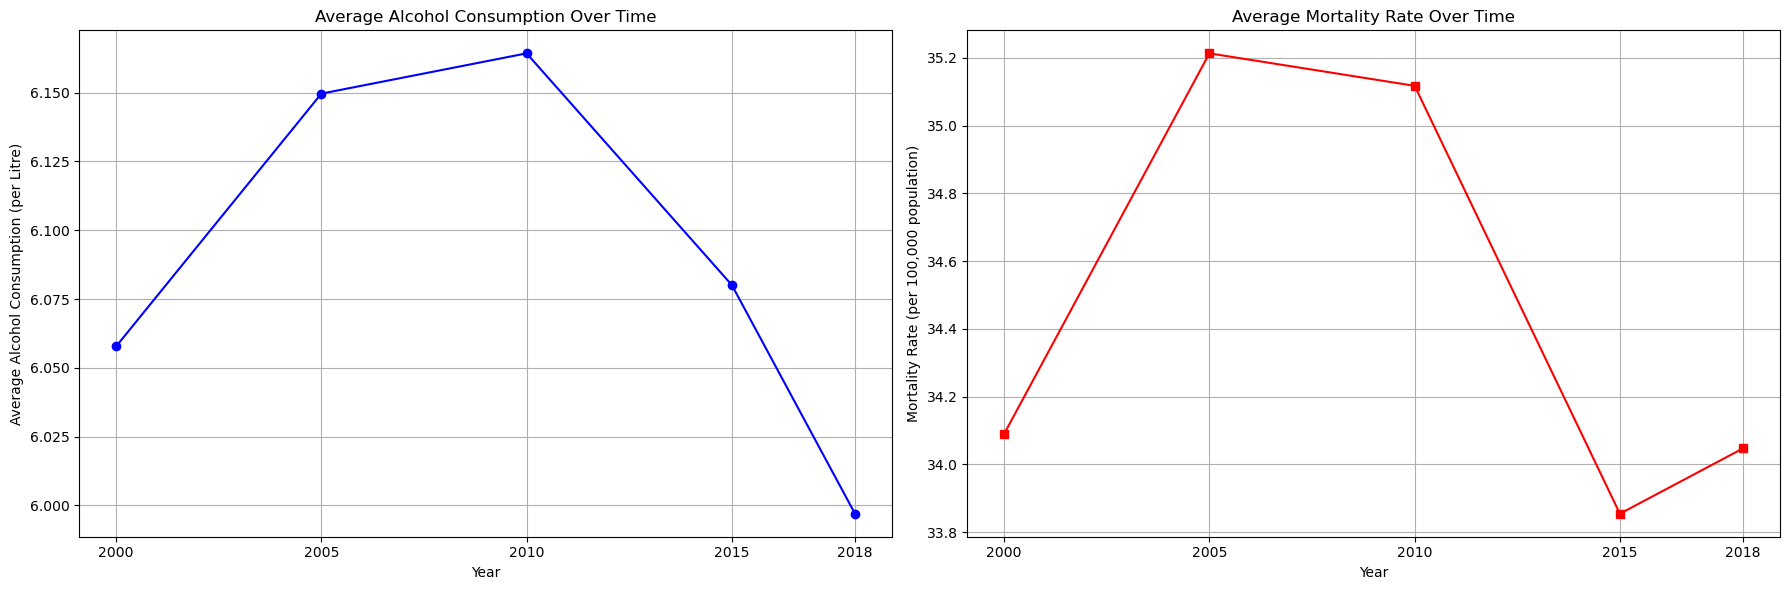

In [99]:
plt.figure(figsize=(18, 6))

# Alcohol Consumption Plot
plt.subplot(1, 2, 1)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Alchohol consumption'], marker='o', linestyle='-', color='blue')
plt.title('Average Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption (per Litre)')
plt.xticks(yearly_trends_filtered['Year'].unique())  # showing  filtered years on the x-axis
plt.grid(True)

# Mortality Rate Plot
plt.subplot(1, 2, 2)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Mortality Rate'], marker='s', linestyle='-', color='red')
plt.title('Average Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.xticks(yearly_trends_filtered['Year'].unique())  # showing  filtered years on the x-axis
plt.grid(True)

plt.tight_layout()  
plt.show()  


The graph shows alcohol consumption and mortality rate due to alcohol. this graph gives some idea about the alchohol consumption and death related to alchohol consumption based on Year of 2000,2005,2010,2015,2018.

Data Analysis

In [111]:
# 1. Descriptive Statistics for alcohol consumption and mortality rates

descriptive_stats = df[['Alchohol consumption', 'Mortality Rate']].describe()

# 2. Correlation Analysis between alcohol consumption and mortality rates
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

# 3. Comparative Analysis: Identifying countries with significant changes
# calculate the mean and standard deviation for alcohol consumption and mortality rates for each country
comparative_analysis = df.groupby('Country').agg({
    'Alchohol consumption': ['mean', 'std'],
    'Mortality Rate': ['mean', 'std']
}).reset_index()

# print the descriptive statistics
print("data comprehension of Alchohol consumptiona and mortality rate")
print(descriptive_stats)

# print the correlation analysis
print("output for correlation")
print(correlation_analysis)

# print the comparative analysis for the first few countries
print(comparative_analysis.head())


data comprehension of Alchohol consumptiona and mortality rate
       Alchohol consumption  Mortality Rate
count            894.000000      894.000000
mean               6.089512       34.461728
std                4.299930       27.282453
min                0.000000        0.668772
25%                2.190000       15.065044
50%                5.615000       31.406040
75%                9.487500       45.476747
max               20.500000      214.849635
output for correlation
                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000
       Country Alchohol consumption           Mortality Rate          
                               mean       std           mean       std
0  Afghanistan                0.210  0.000000       1.640564  0.111313
1      Albania                7.164  0.511253      22.069201  3.845094
2      Algeria                0.784  0.165167       2.588

In [101]:
comparative_analysis['Alchohol consumption']['mean']

0       0.2100
1       7.1640
2       0.7840
3      11.7940
4       6.1420
        ...   
176     7.6400
177     5.2520
178     0.2832
179     5.3620
180     3.7500
Name: mean, Length: 181, dtype: float64

# Data visualization with Histogram and qq plot

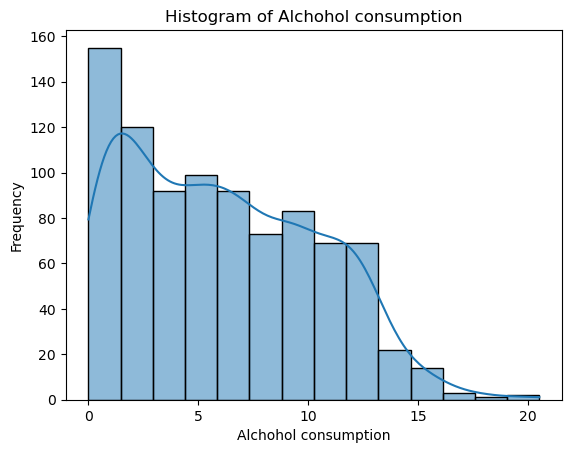

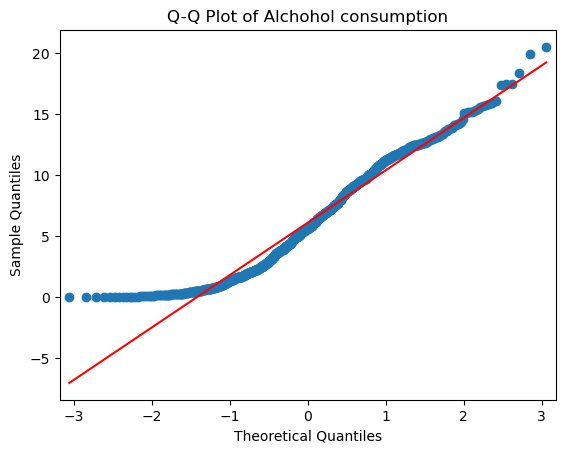

In [118]:
# distribution with a histogram and a Q-Q plot
def check_distribution(data, column):
    """
    This function plots a histogram and a Q-Q plot for the given data column to check the distribution.
    
    """
    # Histogram
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q plot
    fig = plt.figure()
    sm.qqplot(data[column], line='s', ax=fig.add_subplot(111)) # 's' denotes standardized line
    plt.title(f'Q-Q Plot of {column}')
    plt.show()



x = 'Alchohol consumption'
y = 'Mortality Rate'

check_distribution(df, x)


Histogram: 
a
The chart shows that more people drink a small amount of alcohol, and since this distribution is rightly skwed fewer people drinks too muchg alchohol more than 13 litre pure alchohol per year. 

QQ plot:

This Q-Q (quantile-quantile) plot compares the distribution of alcohol consumption data to a normal distribution. Points plotted represent the quantiles of alcohol consumption against the theoretical quantiles of a normal distribution. The red line serves as a reference for where the points would lie if the data were perfectly normal. The points follow the line closely in the middle, suggesting that the median data is normally distributed. However, at both ends, especially the right end, the points deviate from the line, indicating that the data has heavier tails than a normal distribution. This suggests that the distribution of alcohol consumption is right-skewed with some higher extreme values.


C:\Users\dipro\AppData\Local\Temp\ipykernel_4660\1287603905.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(sample_countries, rotation=45)
C:\Users\dipro\AppData\Local\Temp\ipykernel_4660\1287603905.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(sample_countries, rotation=45)


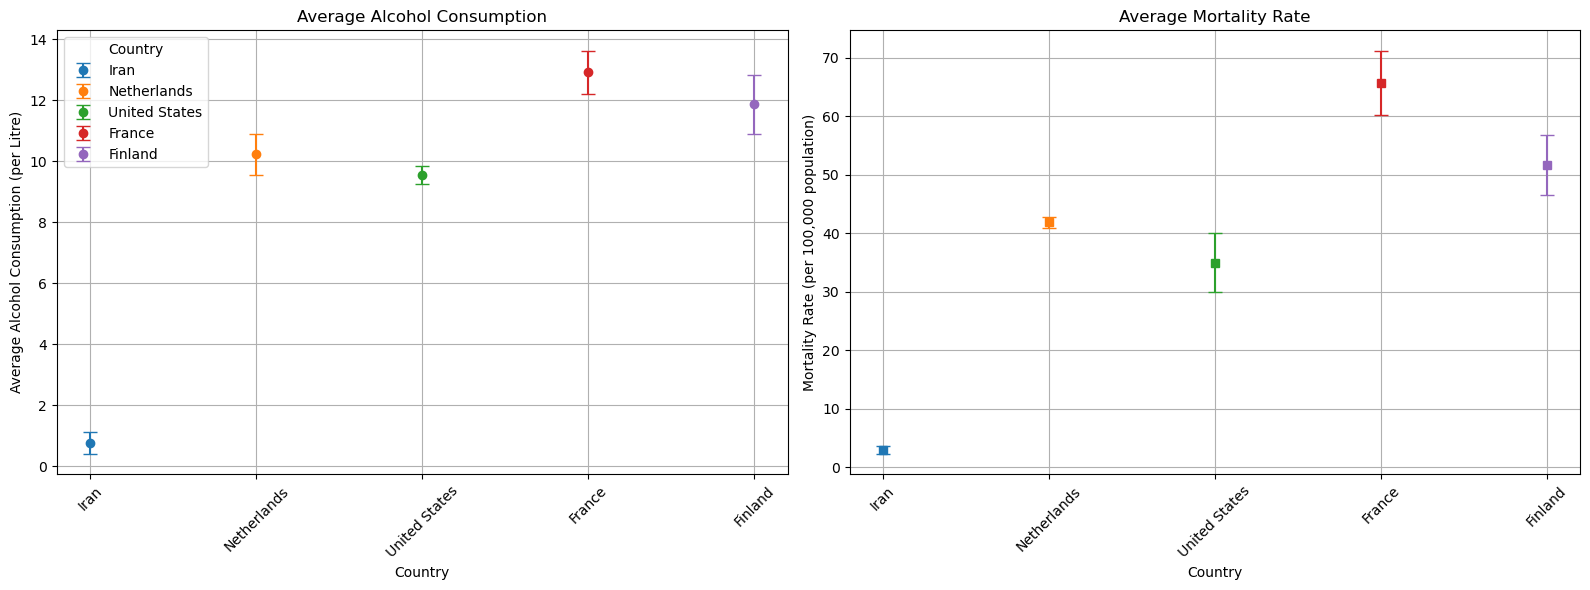

In [119]:
sample_countries = config['countires_to_draw']
sample_data = comparative_analysis[comparative_analysis['Country'].isin(sample_countries)]

# the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Alcohol Consumption Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[0].errorbar(country, country_data['Alchohol consumption']['mean'], yerr=country_data['Alchohol consumption']['std'], fmt='o', capsize=5, label=country)

ax[0].set_title('Average Alcohol Consumption')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Average Alcohol Consumption (per Litre)')
ax[0].set_xticklabels(sample_countries, rotation=45)
ax[0].grid(True)
ax[0].legend(title='Country')

# Mortality Rate Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[1].errorbar(country, country_data['Mortality Rate']['mean'], yerr=country_data['Mortality Rate']['std'], fmt='s', capsize=5, label=country)

ax[1].set_title('Average Mortality Rate')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Mortality Rate (per 100,000 population)')
ax[1].set_xticklabels(sample_countries, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


First plot:
Finland shows the highest average alcohol consumption per liter, with France following closely. The United States and the Netherlands have lower averages, while Iran has the lowest. Error bars indicate variability with the widest seen in France's data.

Second Plot:
The second graph presents the average mortality rate per 100,000 population with the United States having the highest rate, and the lowest observed in Iran. Finland and France have similar mortality rates, and the Netherlands' rate is slightly lower than these two. The error bars, representing standard deviation, show the uncertainty around the mean estimates, with the United States showing significant variability in mortality rate data.

<h1>Time series analysis</h1>

In [104]:
global_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

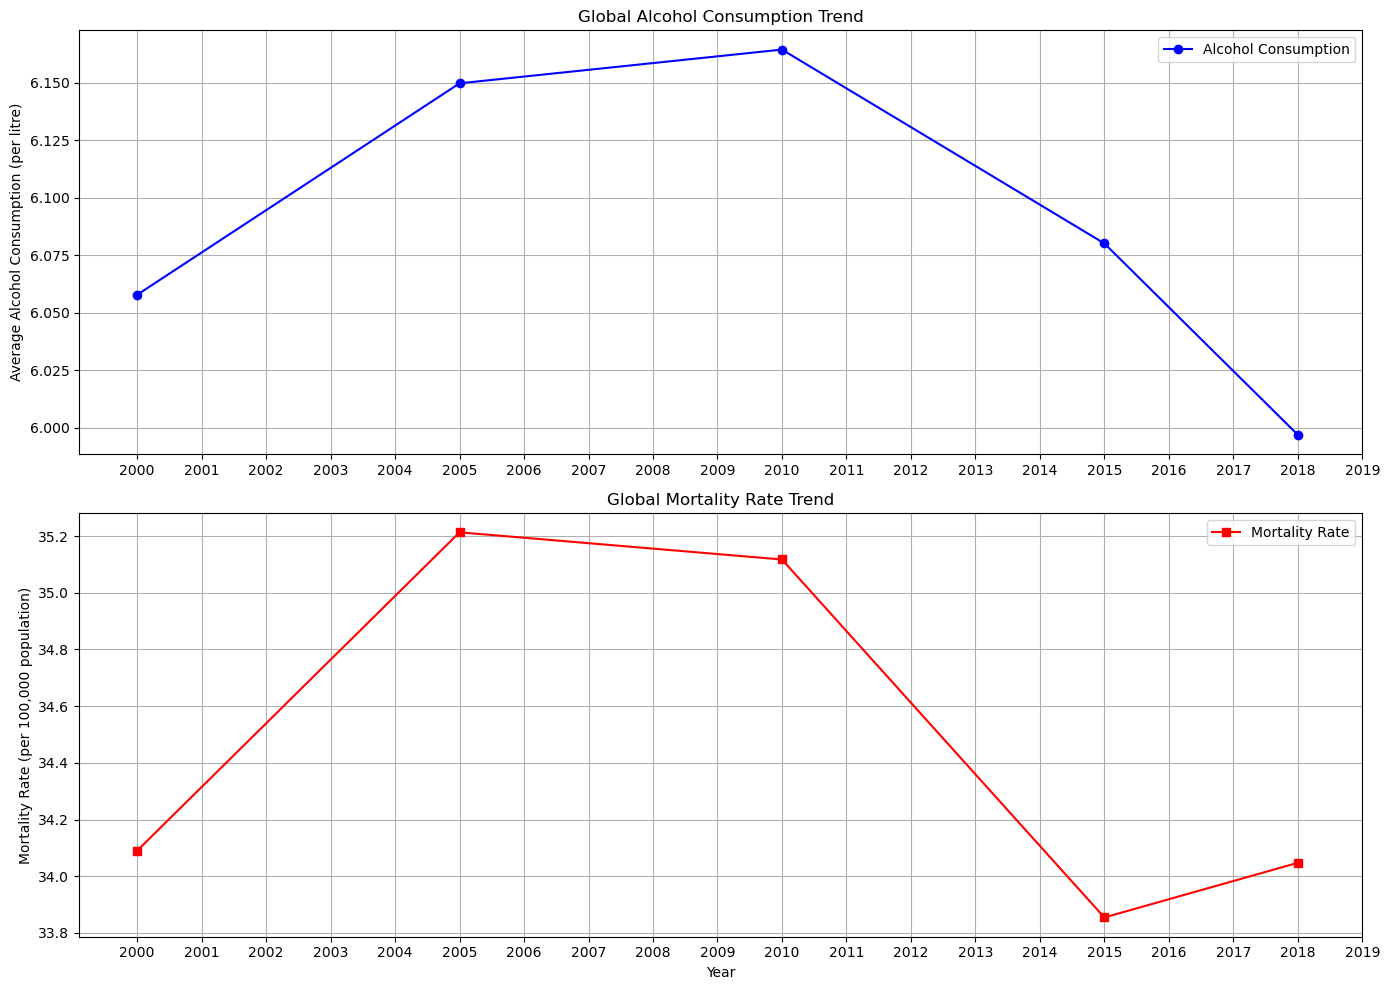

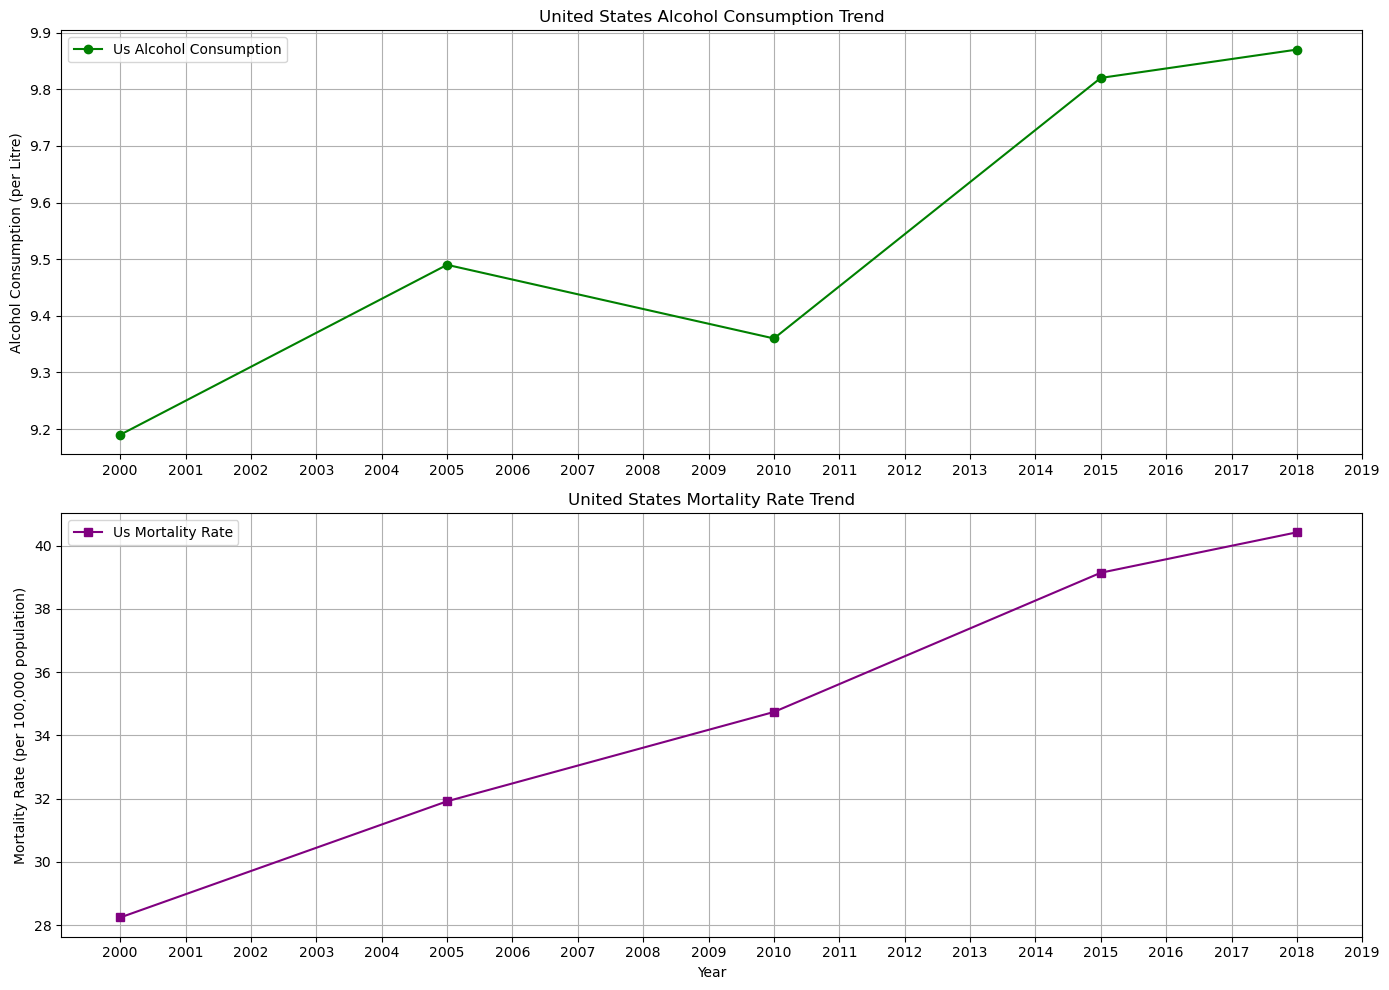

In [120]:
# Plotting Global Trends
plt.figure(figsize=(14, 10))

# Global Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(global_trends['Year'], global_trends['Alchohol consumption'], marker='o', linestyle='-', color='blue',label='Alcohol Consumption')
plt.title('Global Alcohol Consumption Trend')
plt.xticks(range(2000,2020))
plt.ylabel('Average Alcohol Consumption (per litre)')
plt.grid(True)
plt.legend()

# Global Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(global_trends['Year'], global_trends['Mortality Rate'], marker='s', linestyle='-', color='red',label='Mortality Rate')
plt.title('Global Mortality Rate Trend')
plt.xlabel('Year')
plt.xticks(range(2000,2020))
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Time Series Analysis for a Specific Country (Example: United States)
country_name = 'United States'
country_data = df[df['Country'] == country_name]

# Plotting Country-Specific Trends
plt.figure(figsize=(14, 10))

# Country-Specific Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(country_data['Year'], country_data['Alchohol consumption'], marker='o', linestyle='-', color='green', label='Us Alcohol Consumption')
plt.title(f'{country_name} Alcohol Consumption Trend')
plt.xticks(range(2000,2020))
plt.ylabel('Alcohol Consumption (per Litre)')
plt.legend()
plt.grid(True)

# Country-Specific Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(country_data['Year'], country_data['Mortality Rate'], marker='s', linestyle='-', color='purple',label='Us Mortality Rate')
plt.title(f'{country_name} Mortality Rate Trend')
plt.xlabel('Year')
plt.xticks(range(2000,2020))
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Global Alcohol Consumption Trend: 
This graph shows a rise in average global alcohol consumption reaching its peak in 2005, followed by a consistent decrease up to 2018.

Global Mortality Rate Trend: 
This graph displays a sharp increase in the global mortality rate up to 2005, stability until 2010, then a significant decline until 2015, with a minor uptick towards 2018.

<h1>Correlation Analysis</h1>

In [106]:
# Alchohol consumption and Mortality Rate columns 
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

print(correlation_analysis)


                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000


Heatmap

<Axes: >

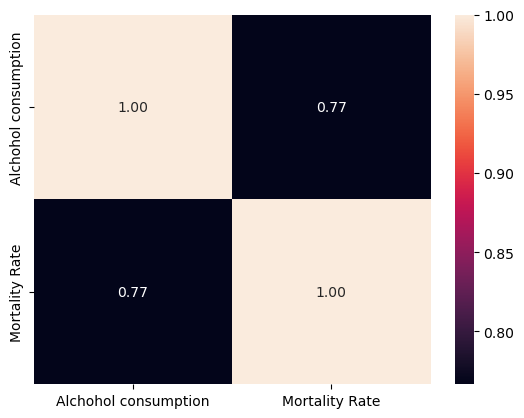

In [107]:
sns.heatmap(correlation_analysis, annot=True, fmt=".2f")

The heatmap shows a strong positive correlation of 0.77 between alcohol consumption and mortality rate, indicating that higher alcohol consumption is associated with higher mortality rates.

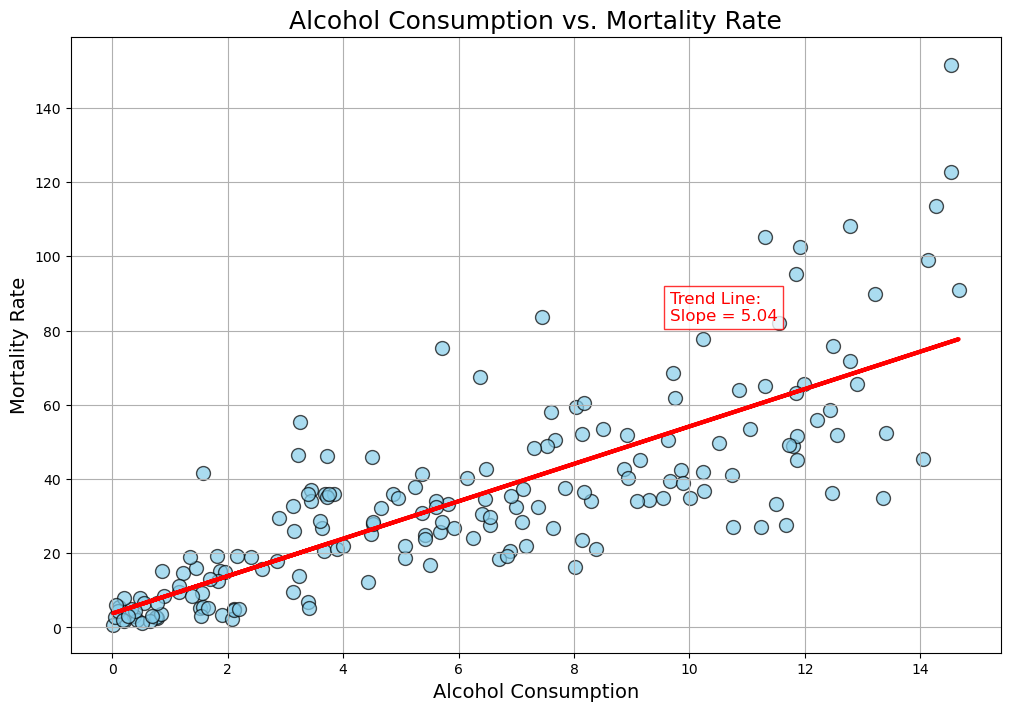

Correlation coefficient: 0.77


In [108]:
df.dropna(subset=["Mortality Rate"], inplace=True)

x = comparative_analysis['Alchohol consumption']['mean']
y = comparative_analysis['Mortality Rate']['mean']


# Creating the scatter plot 
plt.figure(figsize=(12, 8))  
plt.scatter(x, y, alpha=0.7, s=100, edgecolor='k', color='skyblue') 

# Adding a trend line
m, b = np.polyfit(x, y, 1)  # coefficients of the line
plt.plot(x, m*x + b, color='red', linewidth=3)  

# Adding labels and title 
plt.title('Alcohol Consumption vs. Mortality Rate', fontsize=18)
plt.xlabel('Alcohol Consumption', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.grid(True)

# the trend line
plt.text(x.max()-5, m*x.max() + b + 5, f'Trend Line:\nSlope = {m:.2f}', color='red', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.show()


# Correlation c
correlation = np.corrcoef(df['Alchohol consumption'], df['Mortality Rate'])[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')

Based on the scatter plot, Although we see slightly upward trend, we can form the following hypothesis:

The correlation coefficient is 0.77 which indicates it is moderately likely Alcohol consumption has relations to Mortality Rate. Howerver, Correlation is not always result in  causation. Based on my research I have found out that some of the Islamic countries does not drink Alchohol as much as others.

<h1>Final Outcome : </h1>

The study shows that in places where people drink more alcohol, there are usually more deaths related to drinking. This information helps to see that drinking a lot of alcohol can be bad for people's health everywhere in the world. The study checked if this idea was true by looking at the numbers, which is important for making health rules to help keep people safe from drinking too much.Further studies and conditions are necessary to prove this hypothesis.

For my curiosity 

Interactive plot Based on Year,top 10 countries which have maximum deaths

Dropdown(description='Year:', options=(2000, 2005, 2010, 2015, 2018), value=2000)

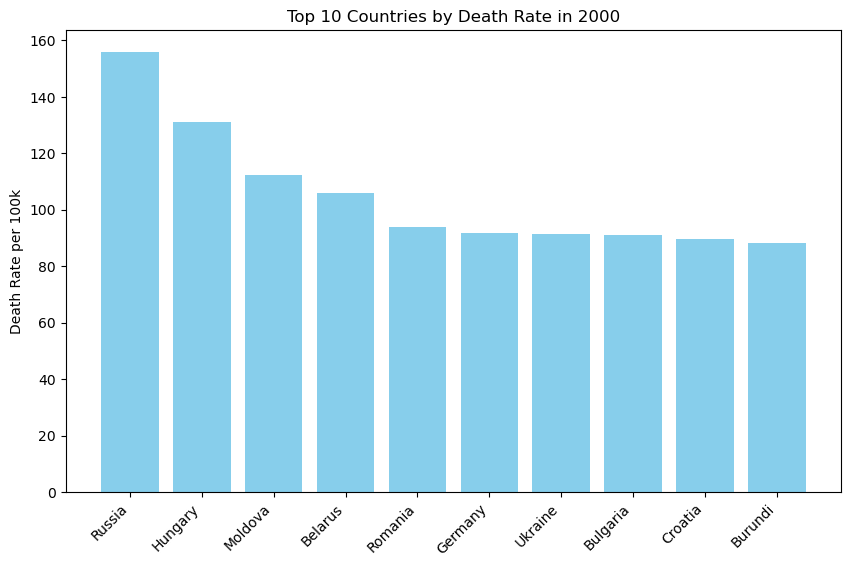

In [109]:

df['Death Rate per 100k'] = (df['Deaths due to Alchohol'] / df['Total Population']) * 100000


def get_top_10_for_year(df, year):
    return df[df['Year'] == year].nlargest(10, 'Death Rate per 100k')[['Country', 'Death Rate per 100k']]

# Dropdown menu for selecting a year
year_dropdown = widgets.Dropdown(
    options=sorted(df['Year'].unique()),  # Unique years in the dataset
    value=sorted(df['Year'].unique())[0],  # Default value
    description='Year:',
    disabled=False,
)

# Function to handle dropdown value change
def dropdown_eventhandler(change):
    clear_output(wait=True)
    display(year_dropdown)
    selected_year = change.new
    
    top_countries = get_top_10_for_year(df, selected_year)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries['Country'], top_countries['Death Rate per 100k'], color='skyblue')
    plt.ylabel('Death Rate per 100k')
    plt.xticks(rotation=45, ha='right')  
    plt.title(f'Top 10 Countries by Death Rate in {selected_year}')
    plt.show()


# Bind the event handler to the dropdown
year_dropdown.observe(dropdown_eventhandler, names='value')

# Display the dropdown
display(year_dropdown)

